### Loading the Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib
matplotlib.rcParams.update({'font.size': 22})

In [6]:
data = pd.read_csv('archive/tech_layoffs.csv')
data.head()

,company,total_layoffs,impacted_workforce_percentage,reported_date,industry,headquarter_location,sources,status,Unnamed: 8
0,C2FO,20,2,12-09-2022,"Fintech, payments","Leawood, KS",Kansas City Business Journal,Private,NaN
1,VideoAmp,Unclear,2,9/19/2022,Advertising platforms,Los Angeles,Company memo,Private,NaN
2,Amperity,13,3,8/20/2022,"Saas, analytics",Seattle,Geekwire,Private,NaN
3,Addepar,20,3,1/18/2023,"fintech, data analytics","Mountain View, CA",Fortune,Private,NaN
4,Thirty Madison,24,3,5/13/2022,Health Care,New York,Axios,Private,NaN


### Preprocess

In [7]:
data['Date'] = pd.to_datetime(data['reported_date'])
data['Month'] = data['Date'].dt.month
data['Year'] = pd.to_datetime(data['Date']).dt.strftime('%Y')

#### Check for NaN valules

In [8]:
data.isnull().sum()

company                            0
total_layoffs                      0
impacted_workforce_percentage      0
reported_date                      0
industry                           0
headquarter_location               0
sources                            0
status                             0
Unnamed: 8                       468
Date                               0
Month                              0
Year                               0
dtype: int64

##### We wont lose any important data related to EDA if we drop the Unnamed: 8 ' column

In [12]:
data.drop('Unnamed: 8', inplace=True, axis=1)

#### Check for value anamolities

In [13]:
from pandas.api.types import is_numeric_dtype

num_cols = ['total_layoffs','impacted_workforce_percentage']
cols = data.columns
for i in cols:
    if is_numeric_dtype(data[i]) == False:
        print(i)

company
total_layoffs
impacted_workforce_percentage
reported_date
industry
headquarter_location
sources
status
Date
Year


##### It looks like all columns have string characters. We need to be careful about this while on EDA

In [14]:
ind = []
for i in data['industry'].to_list():
    ind.append(i.split(' ')[-1])
    
ind = [x.lower() for x in ind]
ind = [x.replace("-", "") for x in ind]

data['industry'] = ind

In [15]:
ind = []
for i in data['headquarter_location'].to_list():
    ind.append(i.split(',')[-1])
    
ind = [x.lower() for x in ind]
ind = [x.replace("-", "") for x in ind]
ind = [x.replace(" ", "") for x in ind]

data['headquarter_location'] = ind

In [16]:
data.drop('sources',inplace=True, axis=1)

### EDA

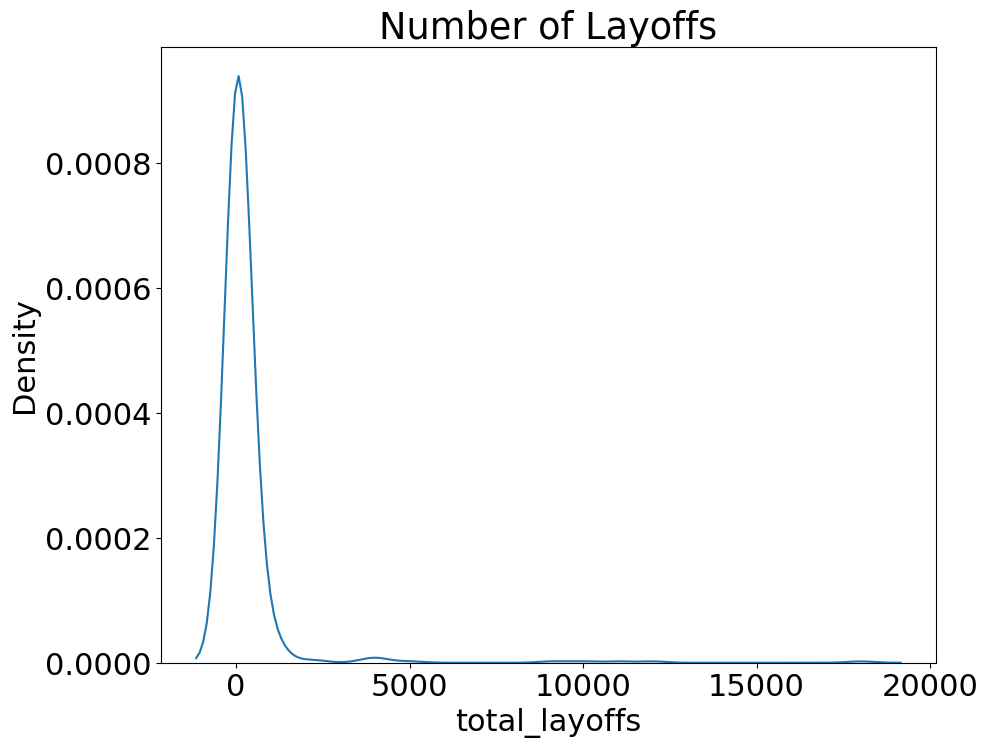

In [17]:
data['total_layoffs'] = data['total_layoffs'].apply(lambda x: 0 if not x.isnumeric() else int(x))


plt.figure(figsize=(10,8))
sns.kdeplot(x=data['total_layoffs'])
plt.title('Number of Layoffs')
plt.show()

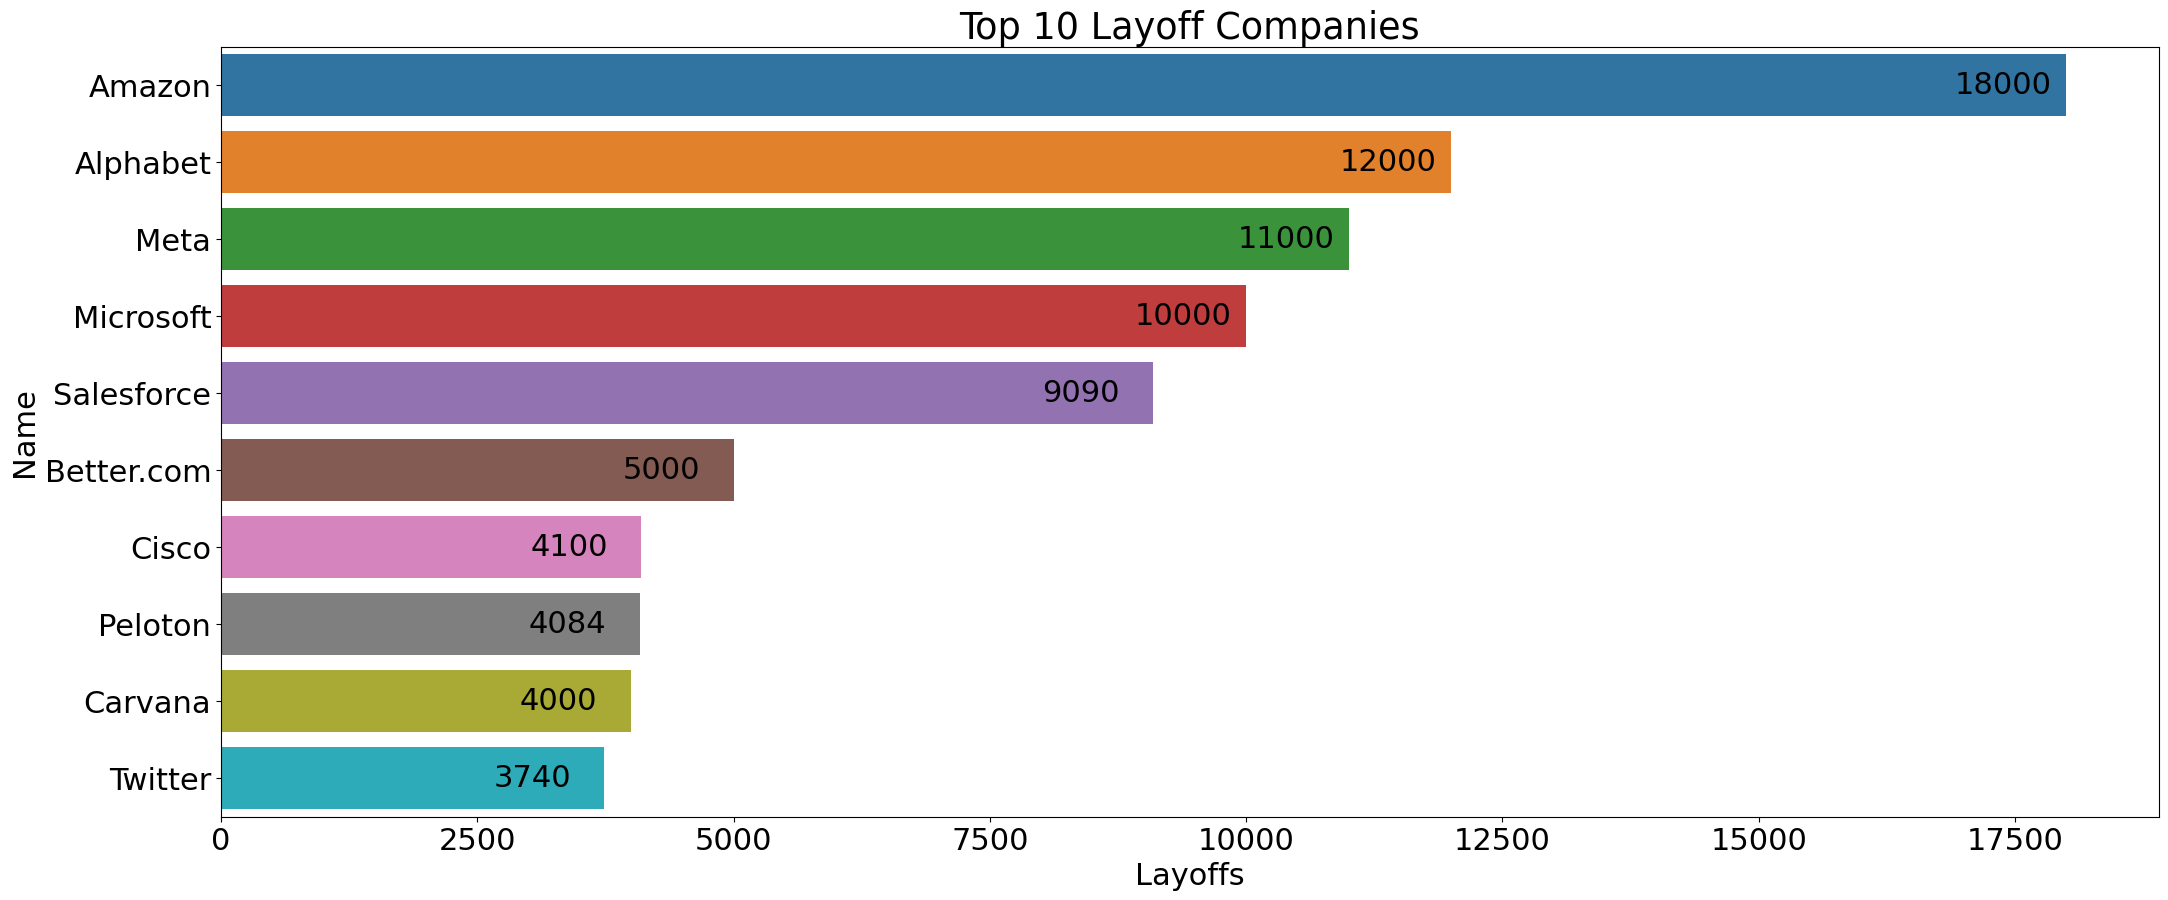

In [18]:
top_10 = data.sort_values('total_layoffs',ascending=False).head(10)

fig, ax = plt.subplots(figsize=(25, 10))
p=sns.barplot(x="total_layoffs", y="company", data=top_10,
              ax=ax)
for container in p.containers:
    p.bar_label(container,padding=-80)
plt.title("Top 10 Layoff Companies")
plt.xlabel('Layoffs')
plt.ylabel('Name')
plt.show()

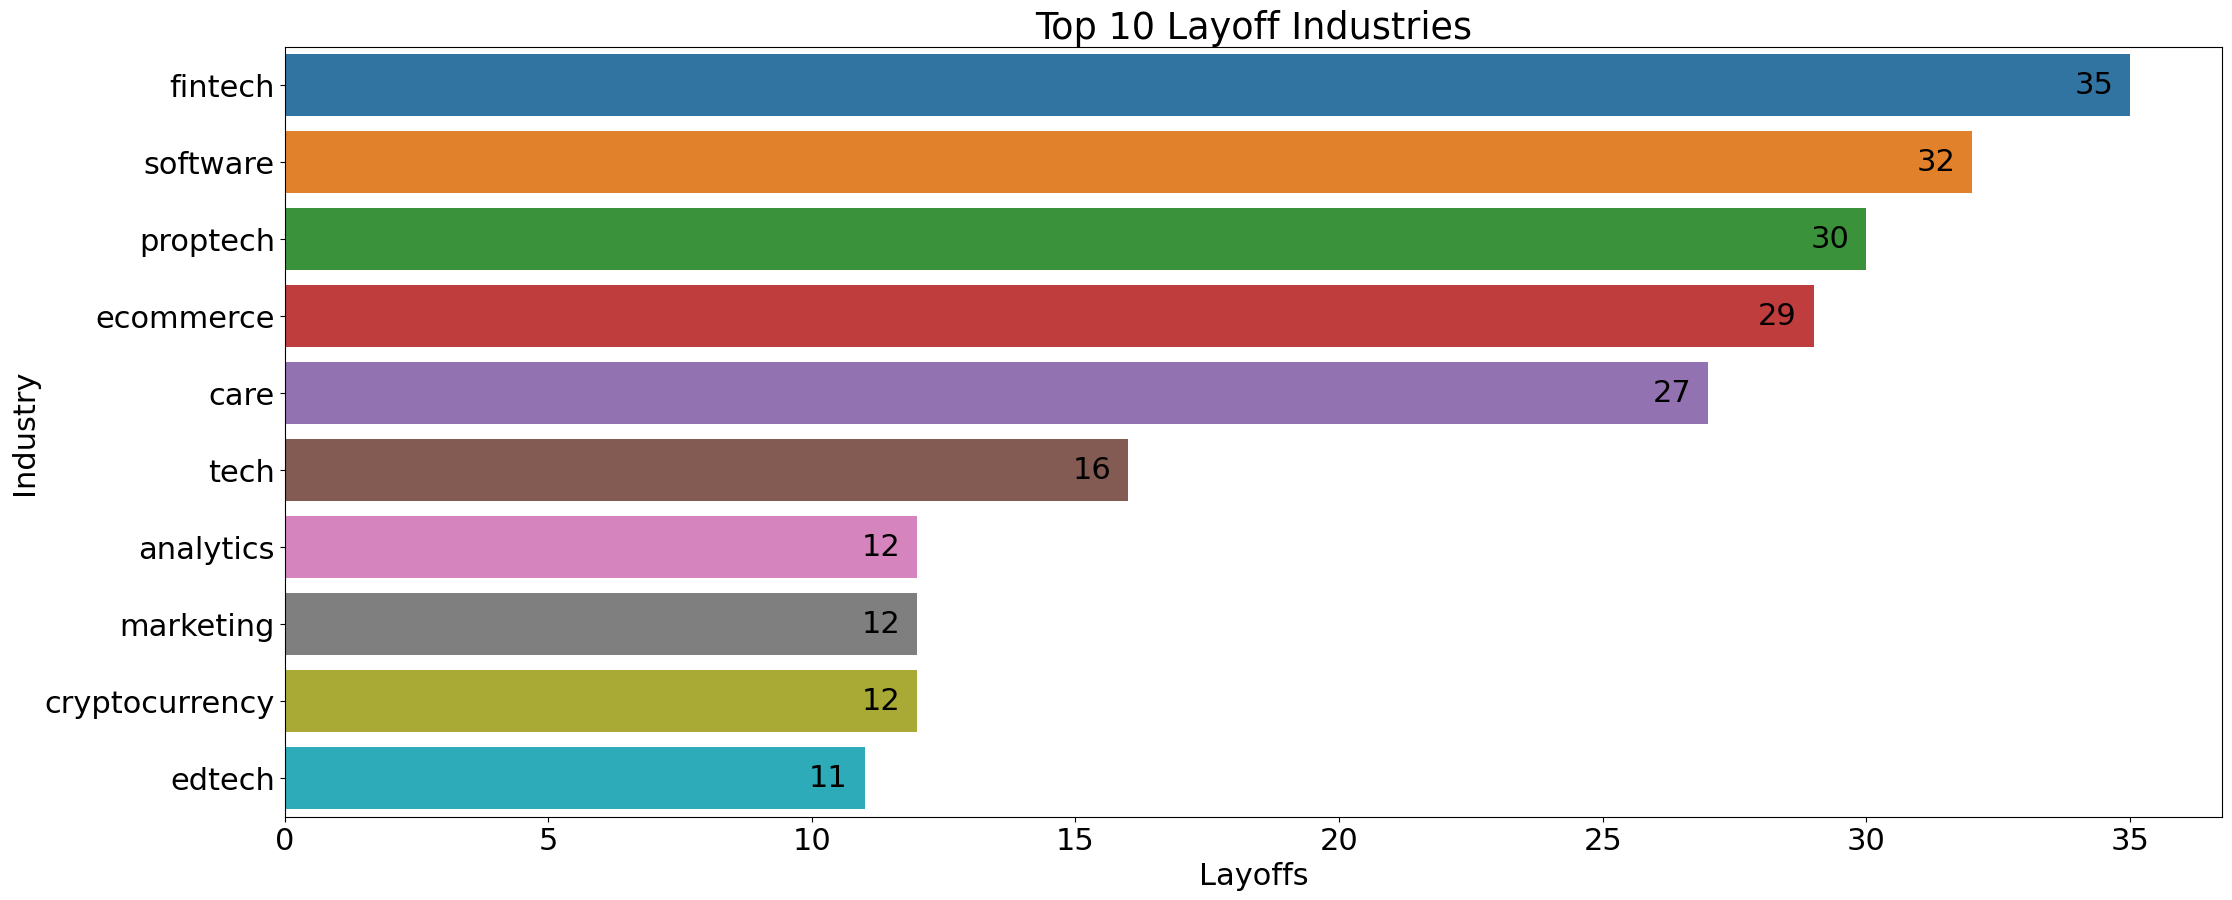

In [19]:
fig, ax = plt.subplots(figsize=(25, 10))
top_10_industries = data['industry'].value_counts().head(10)
top_10_industries = data.groupby('industry').size().sort_values(ascending=False).head(10)
top_10_industries = top_10_industries.to_frame().reset_index()
p=sns.barplot(y='industry',x=0, data=top_10_industries,ax=ax)
for container in p.containers:
    p.bar_label(container,padding=-40)
plt.title("Top 10 Layoff Industries")
plt.xlabel('Layoffs')
plt.ylabel('Industry')
plt.show()

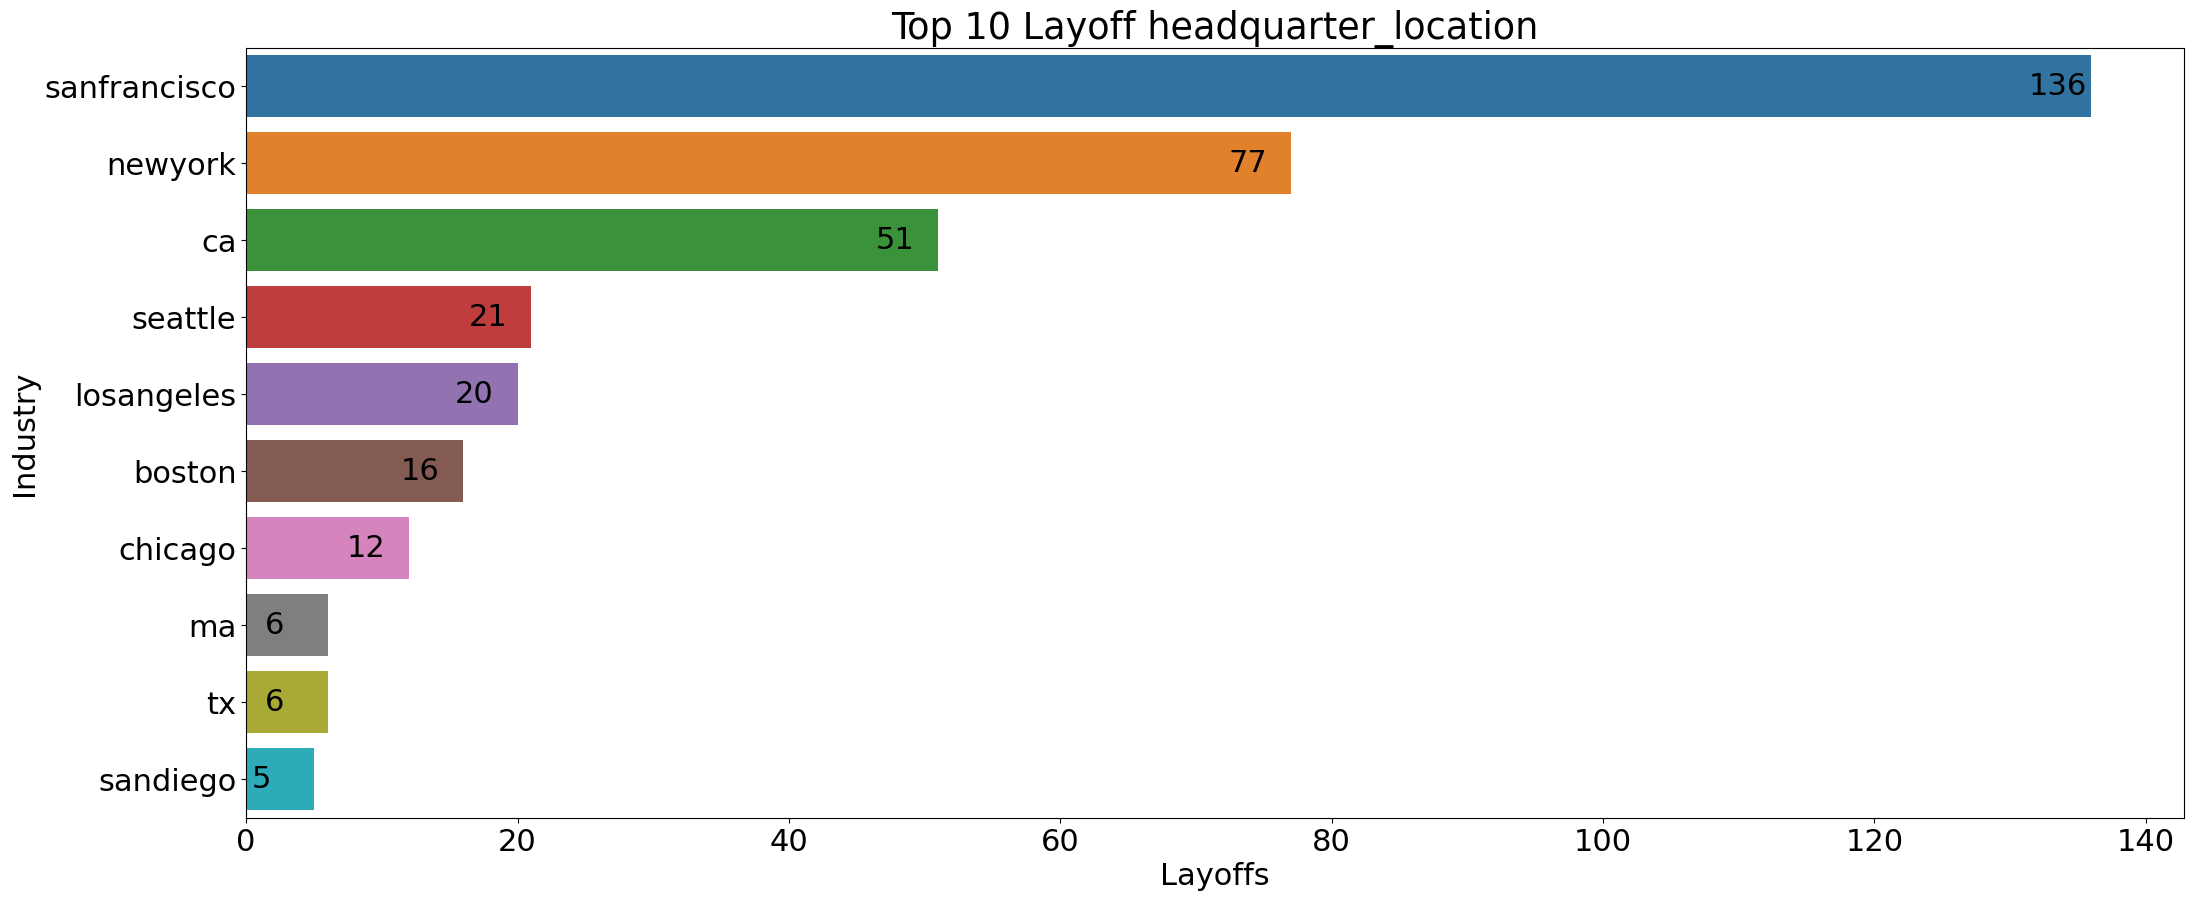

In [20]:
fig, ax = plt.subplots(figsize=(25, 10))
top_10_industries = data['headquarter_location'].value_counts().head(10)
top_10_industries = data.groupby('headquarter_location').size().sort_values(ascending=False).head(10)
top_10_industries = top_10_industries.to_frame().reset_index()
p=sns.barplot(y='headquarter_location',x=0, data=top_10_industries,ax=ax)
for container in p.containers:
    p.bar_label(container,padding=-45)
plt.title("Top 10 Layoff headquarter_location")
plt.xlabel('Layoffs')
plt.ylabel('Industry')
plt.show()

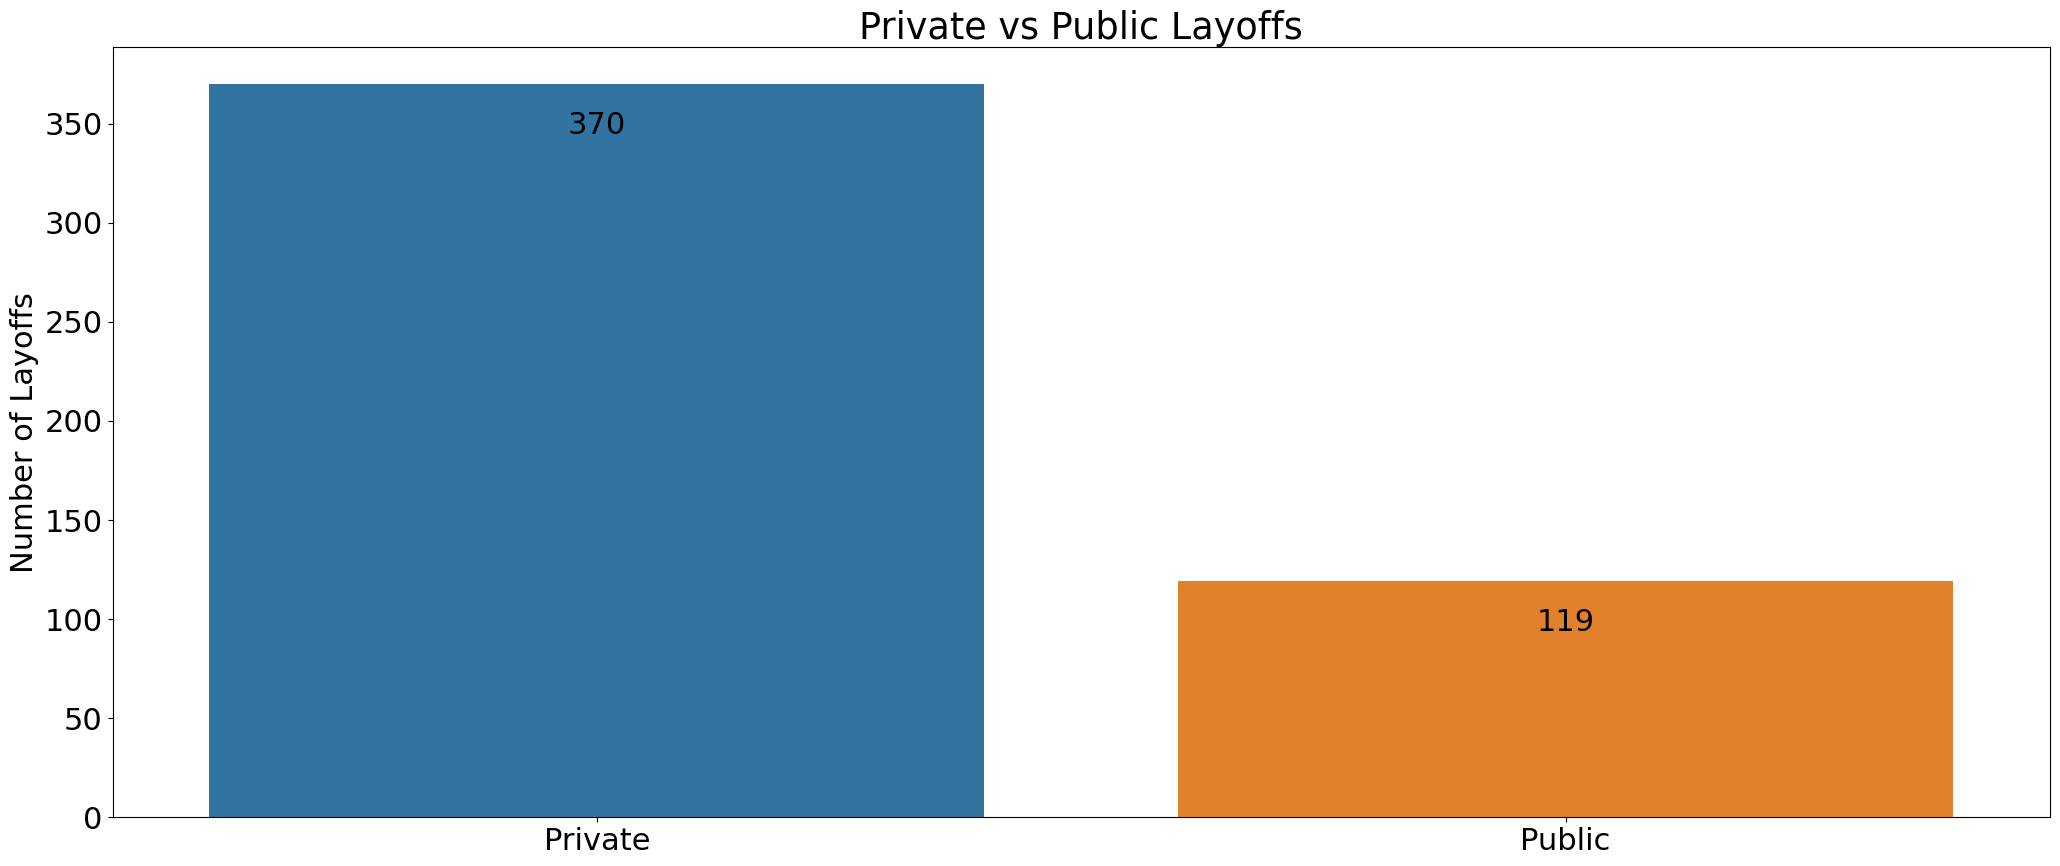

In [21]:
fig, ax = plt.subplots(figsize=(25, 10))
p=sns.countplot(x="status",  data=data,
              ax=ax)
for container in p.containers:
    p.bar_label(container, padding=-40)
plt.title("Private vs Public Layoffs")
plt.xlabel('')
plt.ylabel('Number of Layoffs')
plt.show()

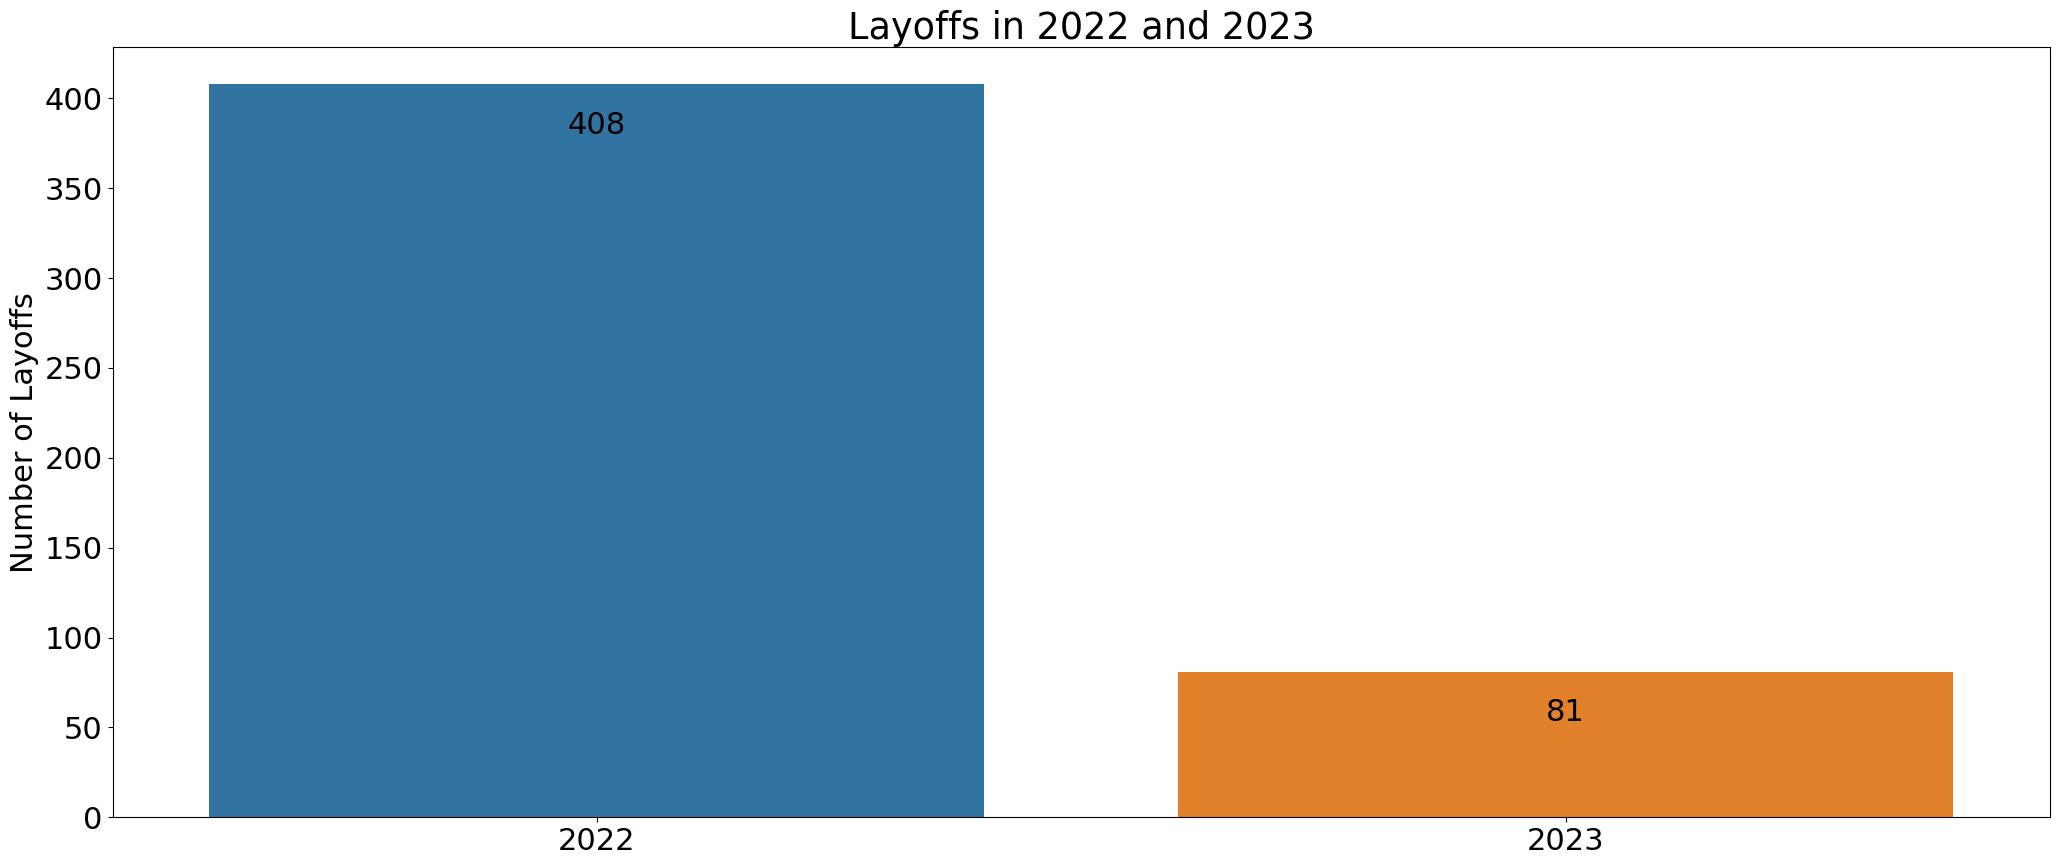

In [22]:
fig, ax = plt.subplots(figsize=(25, 10))
p=sns.countplot(x="Year",  data=data,
              ax=ax)
for container in p.containers:
    p.bar_label(container, padding=-40)
plt.title("Layoffs in 2022 and 2023")
plt.xlabel('')
plt.ylabel('Number of Layoffs')
plt.show()

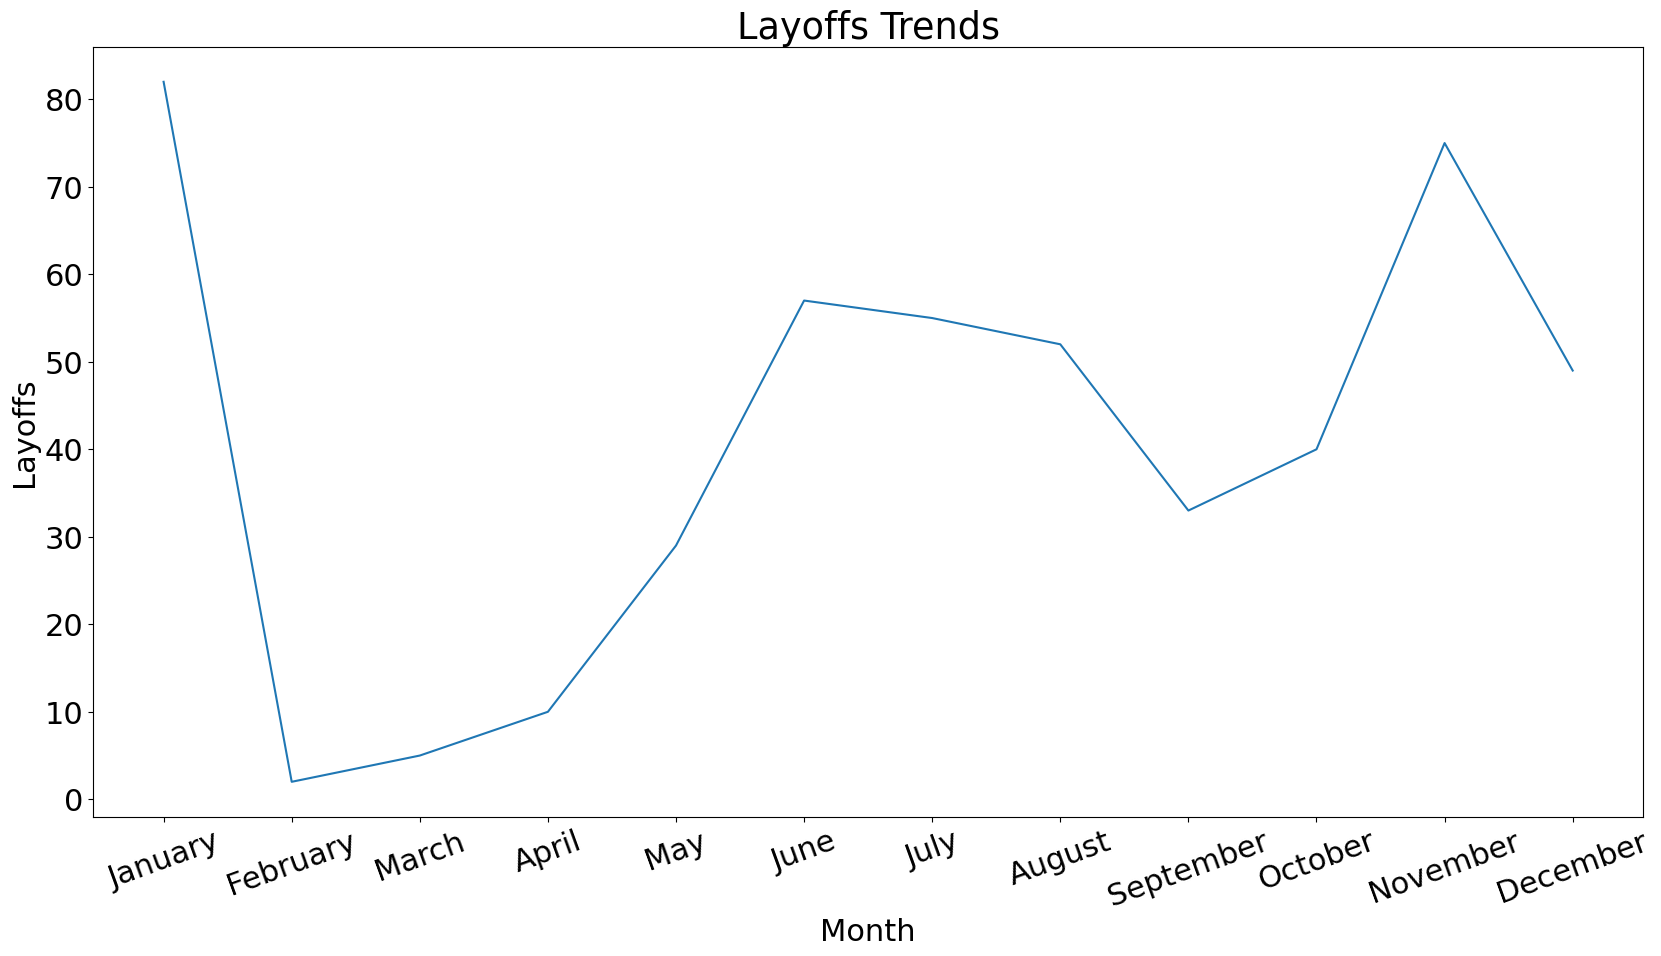

In [23]:
import calendar

plt.figure(figsize=(20,10))

# group the data by month and player and calculate the total feature
gg = data.groupby(["Month"])["total_layoffs"].count()
gg = gg.reset_index()

#create a line chart using Seaborn
sns.lineplot(x="Month", y="total_layoffs", data=gg)

# add a title and axis labels
plt.title("Layoffs Trends")
plt.xlabel("Month")
plt.ylabel("Layoffs")

# set the x-tick labels as the names of the months
plt.xticks(range(1,13), [calendar.month_name[i] for i in range(1,13)], rotation=20)

# show the plot
plt.show()